In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl

Plot of humidity in Szeged for datetime range: 2006-04-01 to 2006-04-09

In [22]:
file_path_weather = '/home/andjela/projects/humidity project/weatherHistory.csv'
df = pd.read_csv(file_path_weather)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
# Convert 'Formatted Date' to datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f %z')

/tmp/ipykernel_1161/3930879111.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f %z')


In [17]:
start_date = '2006-04-01 00:00:00.000 +0200'
end_date = '2006-04-09 23:00:00.000 +0200'
start_date = pd.to_datetime(start_date, format='%Y-%m-%d %H:%M:%S.%f %z')
end_date = pd.to_datetime(end_date, format='%Y-%m-%d %H:%M:%S.%f %z')

In [18]:
mask = (df['Formatted Date'] >= start_date) & (df['Formatted Date'] <= end_date)
filtered_df = df.loc[mask]

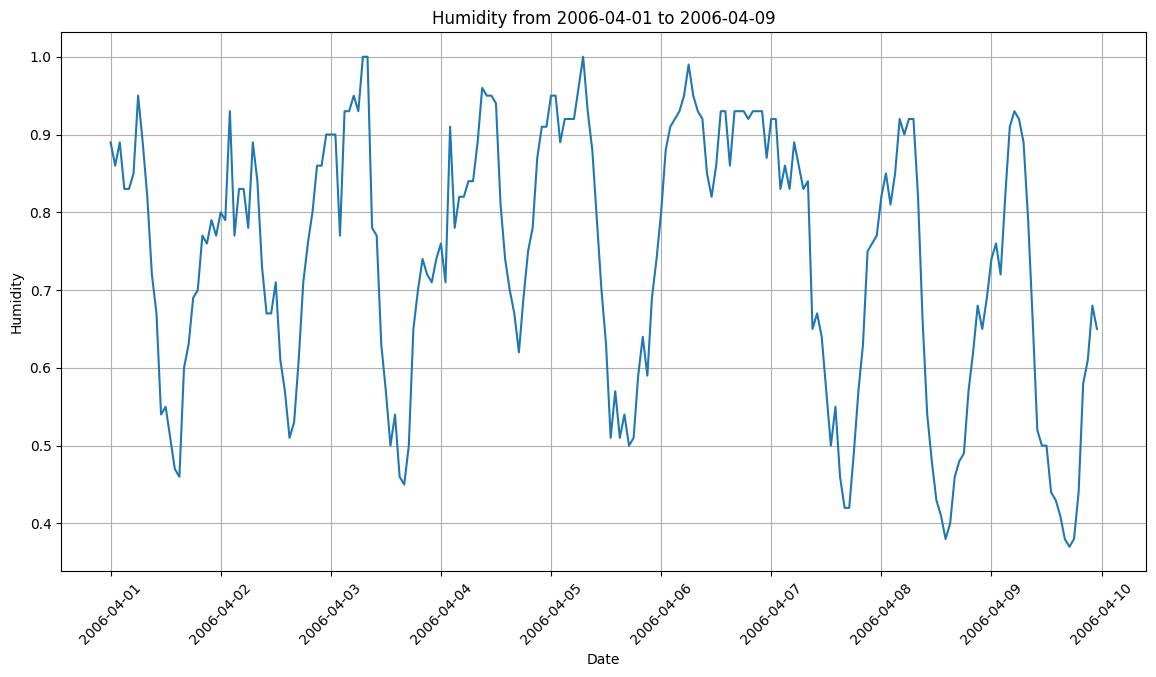

In [19]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Formatted Date', y='Humidity', data=filtered_df)
plt.title('Humidity from 2006-04-01 to 2006-04-09')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Plot of absolute humidity in an Italian city for datetime range: 2004-03-10 to 2004-03-31

In [17]:

file_path_air = '/home/andjela/projects/humidity project/air_quality.xlsx'
df_air = pd.read_excel(file_path_air)
df_air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [30]:
df_air['Date'] = df_air['Date'].astype(str) #converting it to string
df_air['Time'] = df_air['Time'].astype(str)

df_air['DateTime'] = pd.to_datetime(df_air['Date'] + ' ' + df_air['Time']) #merging data and time column into one

df_air.set_index('DateTime', inplace=True) #setting DateTime as and index

df_air.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [23]:
start_datetime = '2004-03-10 00:00:00'
end_datetime = '2004-03-31 23:00:00'
filtered_data = df_air.loc[start_datetime:end_datetime, 'AH']

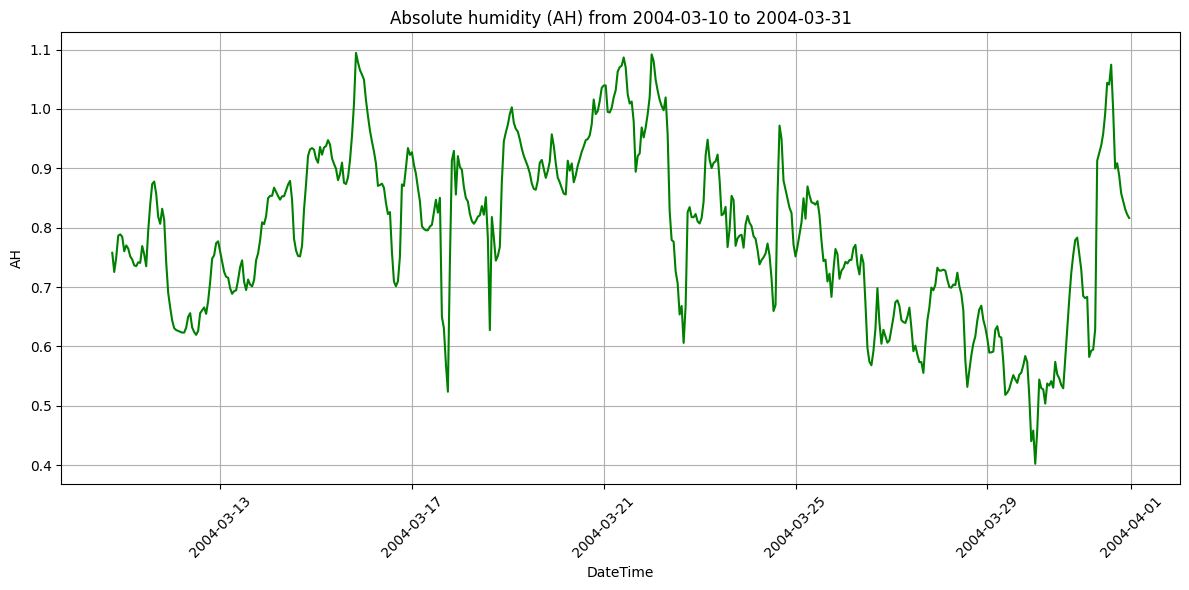

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(filtered_data.index, filtered_data.values,  color='green')
plt.xlabel('DateTime')
plt.ylabel('AH')
plt.title('Absolute humidity (AH) from 2004-03-10 to 2004-03-31')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

Humidity sensors plot for datetime range from 2004-03-10 to 2004-03-31

In [61]:
file_path_temp = '/home/andjela/projects/humidity project/log_temp.csv'
df_temp = pd.read_csv(file_path_temp)
df_temp.head()

,3/14/19,19:33:07,T=22.0,H=20.0
0,3/14/19,19:38:10,T=22.0,H=20.0
1,3/14/19,19:43:11,T=22.0,H=26.0
2,3/14/19,19:48:14,T=22.0,H=26.0
3,3/14/19,19:53:15,T=22.0,H=20.0
4,3/14/19,19:58:15,T=22.0,H=23.0


In [62]:
new_column_names = ['date', 'time', 'temperature', 'humidity']  # new column names

df_temp.columns = new_column_names

df_temp.head()

,date,time,temperature,humidity
0,3/14/19,19:38:10,T=22.0,H=20.0
1,3/14/19,19:43:11,T=22.0,H=26.0
2,3/14/19,19:48:14,T=22.0,H=26.0
3,3/14/19,19:53:15,T=22.0,H=20.0
4,3/14/19,19:58:15,T=22.0,H=23.0


In [63]:
df_temp['DateTime'] = pd.to_datetime(df_temp['date'] + ' ' + df_temp['time'])
df_temp.head()

/tmp/ipykernel_6526/568639142.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_temp['DateTime'] = pd.to_datetime(df_temp['date'] + ' ' + df_temp['time'])


,date,time,temperature,humidity,DateTime
0,3/14/19,19:38:10,T=22.0,H=20.0,2019-03-14 19:38:10
1,3/14/19,19:43:11,T=22.0,H=26.0,2019-03-14 19:43:11
2,3/14/19,19:48:14,T=22.0,H=26.0,2019-03-14 19:48:14
3,3/14/19,19:53:15,T=22.0,H=20.0,2019-03-14 19:53:15
4,3/14/19,19:58:15,T=22.0,H=23.0,2019-03-14 19:58:15


In [64]:

df_temp['humidity'] = df_temp['humidity'].astype(str).str.extract(r'H=(\d+\.\d)').astype(float)


Before extraction in DateTime column:
 96118
After extraction in DateTime column:
 96118


In [68]:
start_datetime = '2019-03-14 00:00:00'
end_datetime = '2019-03-14 23:58:41'
filtered_data = df_temp[(df_temp['DateTime'] >= start_datetime) & (df_temp['DateTime'] < end_datetime)]

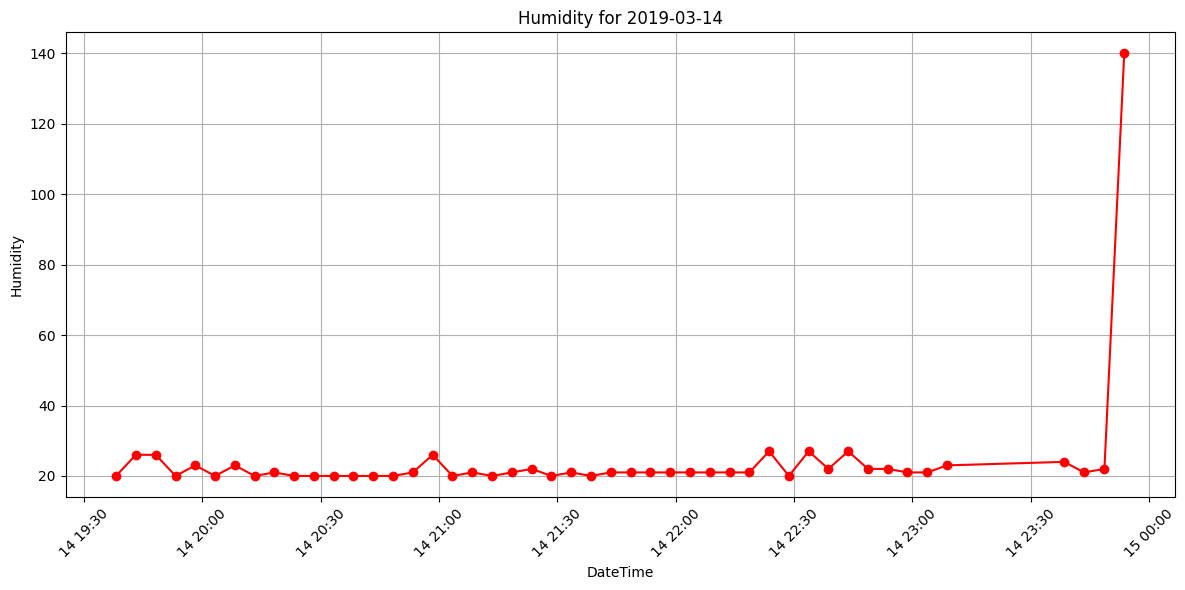

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['DateTime'], filtered_data['humidity'], marker='o', linestyle='-', color='red')
plt.xlabel('DateTime')
plt.ylabel('Humidity')
plt.title('Humidity for 2019-03-14')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()